<a href="https://colab.research.google.com/github/cuoicungtui/graphrag/blob/main/RagGraph_DeepDive_1_Modularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tác giả: [ProtonX Team](https://protonx.io/)

In [ ]:
import networkx as nx

![](https://storage.googleapis.com/mle-courses-prod/users/61b6fa1ba83a7e37c8309756/private-files/e974de60-530f-11ef-bf69-71eafa46c86b-RAGGraph___Neo4J___CamelAI__1_.png)

[Nguồn bài báo](https://arxiv.org/pdf/1810.08473)

### Mục đích của tính toán Modularity
Mục đích của việc tính toán modularity là để đánh giá mức độ phân chia đồ thị thành các cộng đồng. Thuật toán Louvain/Leiden sử dụng thước đo này để tinh chỉnh phân hoạch của đồ thị nhằm tối đa hóa modularity, từ đó khám phá ra cấu trúc cộng đồng phản ánh tốt nhất các phân chia tự nhiên trong đồ thị.

Hàm `calculate_modularity` được sử dụng để đo lường chất lượng của một phân hoạch cụ thể của một đồ thị thành các cộng đồng. Modularity là một giá trị vô hướng nằm trong khoảng từ \(-1\) đến \(1\) dùng để định lượng mật độ của các liên kết bên trong cộng đồng so với các liên kết giữa các cộng đồng. Một modularity cao hơn chỉ ra một cấu trúc cộng đồng mạnh mẽ hơn.

### Giải thích chi tiết của hàm `calculate_modularity`

#### Đầu vào:
1. **G**: Đồ thị mà modularity đang được tính.
2. **partition**: Một dictionary trong đó các khóa là các nút và các giá trị là ID của các cộng đồng mà các nút thuộc về.
3. **m**: Tổng trọng số của tất cả các cạnh trong đồ thị.

#### Các bước:
1. **Tính toán degree**:
   - `degrees = dict(G.degree(weight='weight'))`: Tạo một dictionary mà mỗi khóa là một nút và mỗi giá trị là tổng trọng số của các cạnh kết nối đến nút đó.

2. **Duyệt qua các cộng đồng**:
   - `for community in set(partition.values())`: Duyệt qua từng cộng đồng duy nhất.

3. **Các nút trong cộng đồng**:
   - `nodes = [n for n in partition if partition[n] == community]`: Tạo một danh sách các nút thuộc về cộng đồng hiện tại.

4. **Tạo subgraph**:
   - `subgraph = G.subgraph(nodes)`: Tạo một subgraph chỉ bao gồm các nút trong cộng đồng hiện tại.

5. **Tính toán \(e_c\) và \(k_c\)**:
   - `ec = subgraph.size(weight='weight')`: Tính tổng trọng số của các cạnh trong cộng đồng hiện tại.
   - `kc = sum(degrees[n] for n in nodes)`: Tính tổng của các degree của tất cả các nút trong cộng đồng hiện tại.

6. **Đóng góp của Modularity**:
   - `Q += ec / m - (kc / (2 * m)) ** 2`: Thêm đóng góp modularity của cộng đồng hiện tại vào tổng modularity \(Q\).

7. **Trả về Modularity**:
   - `return Q`: Trả về tổng modularity cho phân hoạch đã cho.

### Công thức toán học cho Modularity
Modularity \(Q\) được tính bằng công thức:
$$Q = \sum_{c} \left( \frac{e_c}{m} - \left( \frac{k_c}{2m} \right)^2 \right)$$
trong đó:
- \(e_c\) là tổng trọng số của các cạnh trong cộng đồng \(c\).
- \(k_c\) là tổng của các degree của các nút trong cộng đồng \(c\).
- \(m\) là tổng trọng số của tất cả các cạnh trong đồ thị.





In [ ]:
def calculate_modularity(G, partition, m):
    Q = 0.0  # Khởi tạo giá trị modularity
    # Tính tổng trọng số của các cạnh kết nối đến mỗi nút
    # Với data karate kid thì trọng số bằng số cạnh của mỗi nút.
    # Lúc đầu sẽ như sau:
    # {0: 42, 1: 29, 2: 33, 3: 18, ...}
    degrees = dict(G.degree(weight='weight'))

    for community in set(partition.values()):  # Duyệt qua từng cộng đồng
        # Lấy danh sách các nút trong cộng đồng
        nodes = [n for n in partition if partition[n] == community]

        # Tạo đồ thị con cho cộng đồng
        subgraph = G.subgraph(nodes)
        # Tính tổng trọng số của các cạnh trong đồ thị con
        ec = subgraph.size(weight='weight')

        # Tính tổng trọng số của các cạnh kết nối đến các nút trong cộng đồng
        kc = sum(degrees[n] for n in nodes)

        # Cập nhật giá trị modularity
        Q += ec / m - (kc / (2 * m)) ** 2
    return Q  # Trả về giá trị modularity

In [ ]:
# @title Hàm hiển thị đồ thị
def display_graph_with_communities(G, partition, title):
    pos = nx.spring_layout(G)  # Bố trí các nút trong không gian 2D

    # Vẽ các cạnh
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    # Vẽ các nút với màu sắc dựa trên cộng đồng
    colors = ['red' if partition[node] == 0 else 'blue' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=500)

    # Vẽ nhãn cho các nút
    nx.draw_networkx_labels(G, pos)

    # Hiển thị đồ thị
    plt.title(title)
    plt.show()


In [ ]:
G_high_modularity = nx.Graph()
edges_high_modularity = [(0, 1), (0, 3), (1, 3), (2, 3), (4,2)]   # Các cạnh kết nối mạnh mẽ
G_high_modularity.add_edges_from(edges_high_modularity)

# Tạo phân hoạch mới cho đồ thị với các cộng đồng khác nhau
partition_high_modularity = {0: 0, 1: 0, 2: 1, 3: 0, 4: 1}  # Chia các nút thành hai cộng đồng mới
m_high_modularity_score = G_high_modularity.size(weight='weight')  # Tính tổng trọng số các cạnh

# Tính modularity cho đồ thị với phân hoạch mới
modularity_high_modularity_score = calculate_modularity(G_high_modularity, partition_high_modularity, m_high_modularity_score)
print("Modularity của cộng đồng phân hoạch tốt:", modularity_high_modularity_score)

Modularity của cộng đồng phân hoạch tốt: 0.22000000000000006


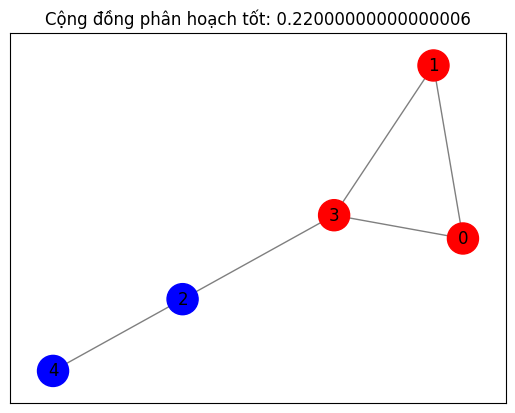

In [ ]:
display_graph_with_communities(G_high_modularity, partition_high_modularity_score, "Cộng đồng phân hoạch tốt: {}".format(modularity_high_modularity_score))

Modularity của cộng đồng phân hoạch kém: -0.03125


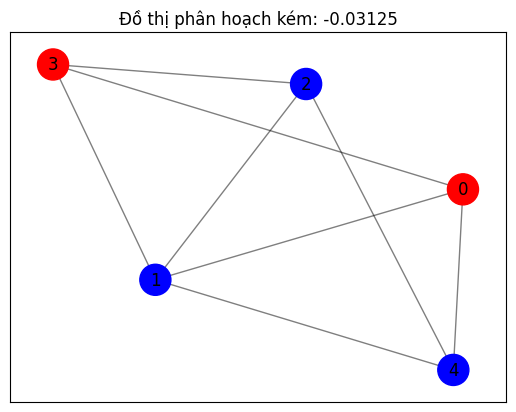

In [ ]:
G_low_modularity = nx.Graph()
edges_low_modularity_score = [(0, 1), (0, 3), (1, 3), (2, 3), (4,2), (2, 1), (4, 1), (0, 4)]
G_low_modularity.add_edges_from(edges_low_modularity_score)

# Tạo phân hoạch cho đồ thị với hai cộng đồng
partition_low_modularity = {0: 0, 1: 1, 2: 1, 3: 0, 4: 1}  # Chia các nút thành hai cộng đồng
m_low_modularity_score = G_low_modularity.size(weight='weight')  # Tính tổng trọng số các cạnh

# Tính modularity cho đồ thị
modularity_low_modularity_score = calculate_modularity(G_low_modularity, partition_low_modularity, m_low_modularity_score)
print("Modularity của cộng đồng phân hoạch kém:", modularity_low_modularity_score)

# Hiển thị đồ thị
display_graph_with_communities(G_low_modularity, partition_low_modularity, "Đồ thị phân hoạch kém: ".format(modularity_low_modularity_score))